In [10]:
from openpharmacophore.utils import ligand_features, conformers
from openpharmacophore.pharmacophore import Pharmacophore
from rdkit import Chem

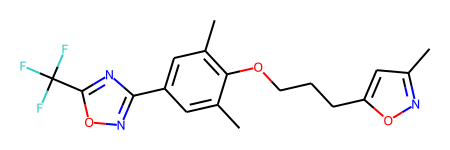

In [4]:
mol = Chem.MolFromSmiles("CC1=CC(=CC(=C1OCCCC2=CC(=NO2)C)C)C3=NOC(=N3)C(F)(F)F")
mol

In [15]:
hydrophobic_smarts = [
        "[$([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])&!$(**[CH3X4,CH2X3,CH1X2,F,Cl,Br,I])]",
        "[$(*([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])[CH3X4,CH2X3,CH1X2,F,Cl,Br,I])&!$(*([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])[CH3X4,CH2X3,CH1X2,F,Cl,Br,I])]([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])[CH3X4,CH2X3,CH1X2,F,Cl,Br,I]",
        "[C&r3]1~[C&r3]~[C&r3]1",
        "[C&r4]1~[C&r4]~[C&r4]~[C&r4]1",
        "[C&r5]1~[C&r5]~[C&r5]~[C&r5]~[C&r5]1",
        "[C&r6]1~[C&r6]~[C&r6]~[C&r6]~[C&r6]~[C&r6]1",
        "[C&r7]1~[C&r7]~[C&r7]~[C&r7]~[C&r7]~[C&r7]~[C&r7]1",
        "[C&r8]1~[C&r8]~[C&r8]~[C&r8]~[C&r8]~[C&r8]~[C&r8]~[C&r8]1",
        "[CH2X4,CH1X3,CH0X2]~[CH3X4,CH2X3,CH1X2,F,Cl,Br,I]",
        "[$([CH2X4,CH1X3,CH0X2]~[$([!#1]);!$([CH2X4,CH1X3,CH0X2])])]~[CH2X4,CH1X3,CH0X2]~[CH2X4,CH1X3,CH0X2]",
        "[$([CH2X4,CH1X3,CH0X2]~[CH2X4,CH1X3,CH0X2]~[$([CH2X4,CH1X3,CH0X2]~[$([!#1]);!$([CH2X4,CH1X3,CH0X2])])])]~[CH2X4,CH1X3,CH0X2]~[CH2X4,CH1X3,CH0X2]~[CH2X4,CH1X3,CH0X2]",
        "[$([S]~[#6])&!$(S~[!#6])]",
        ]

smarts_dict = {smarts : "Hydrophobe" for smarts in hydrophobic_smarts}

mol = conformers.generate_conformers(mol, 1, 1)
points = ligand_features.ligands_pharmacophoric_points(mol, 1.0, feat_def=smarts_dict)

In [16]:
points

{'ligand_0': {'conformer_0': [HydrophobicSphere(center: (1.4268, -1.9841, -1.4186); radius: 1.0),
   HydrophobicSphere(center: (-2.1301, -0.5416, -0.4795); radius: 1.0)]}}

In [11]:
ph4 = Pharmacophore(
    elements=points["ligand_0"]["conformer_0"])
ph4

Pharmacophore(n_elements: 2)

In [12]:
import nglview as nv

view = nv.NGLWidget()
view.add_component(mol)
ph4.add_to_NGLView(view)
view

NGLWidget()